# Reflections inside a sphere

A long time ago I [played around](https://arundquist.wordpress.com/2017/02/10/lasers-bouncing-inside-stuff/) with things bouncing around inside of interested regions. I was re-reading that post and I saw that I said 
>I should note that I started this project wondering what happens in a sphere. But it turns out that it’s super boring

I couldn't remember exactly why it was boring, but I started to think that any initial ray inside a sphere can be thought of as a ray inside a great circle and so I think that the particle will just stay in the plane of that great circle.

Then I stumbled upon `NBodySimulation` in the Wolfram Engine and found they have a really easy way of doing this. You can set up your simulation (with some very helpful aids like "InverseSquare" as the "PairwisePotential") and also tell it the region in which to do the simulation. Setting the region to a `Disk[]` in 2D works great:

NBodySimulationData[1, <5.>]
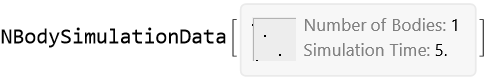

In [88]:
data  = NBodySimulation[
  Association[
   "Region" -> Disk[]], {<|"Mass" -> 1, "Position" -> {.2, .3}, 
    "Velocity" -> {.4, .5}|>}, 5]

-Graphics-
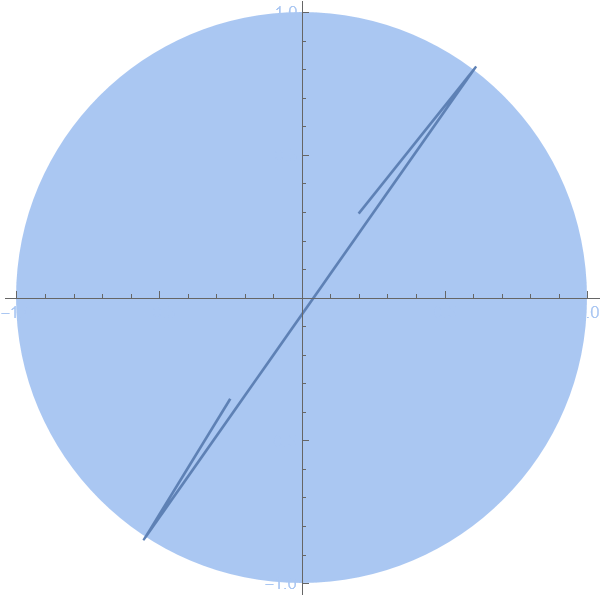

In [89]:
Show[Region[Disk[]], 
 ParametricPlot[Evaluate[data[All, "Position", t]], {t, 0, 5}], 
 Axes -> True]

So now let's consider setting the region to a `Ball[]` in 3D:

NBodySimulationData[5, <50.>]
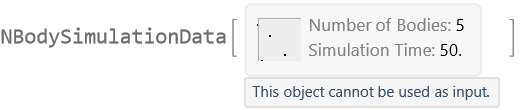

In [1]:
data  = NBodySimulation[
  Association["Region" -> Ball[]], 
           Table[<|"Mass"->1, "Position" -> RandomPoint[Ball[]], "Velocity" -> RandomReal[{-1,1},{3}]|>,{5}]
    , 50]

-Graphics3D-
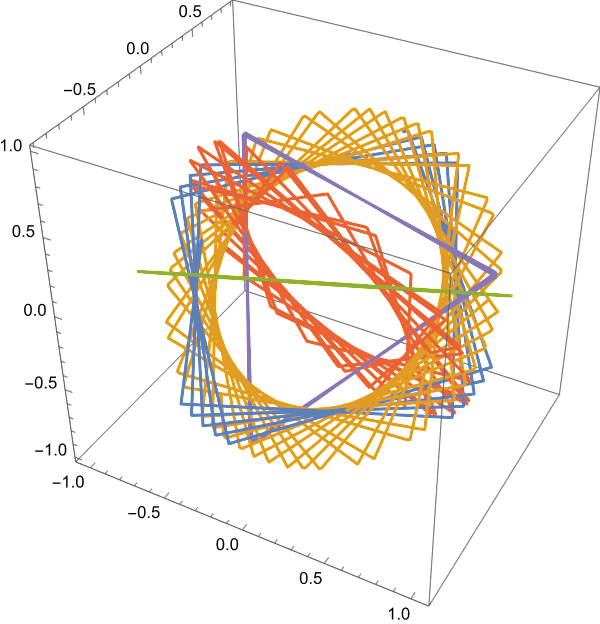

In [2]:
Show[
 ParametricPlot3D[Evaluate[data[All, "Position", t]], {t, 0, 50}],
 Axes -> True]

Yep, they all stay in a plane. The triangle one is really interesting, it seems to me.

Ok, so let's have some more fun. Let's turn on some interaction among those 5 particles. You do that with `"PairwisePotential"->"InverseSquare"`

NBodySimulationData[5, <5.>]
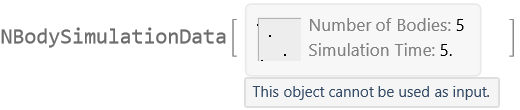

In [48]:
data  = NBodySimulation[
  Association["PairwisePotential"->"InverseSquare",
   "Region" -> Ball[]], 
           Table[<|"Mass"->1, "Position" -> RandomPoint[Ball[]], "Velocity" -> RandomReal[{-.1,.1},{3}]|>,{5}]
    , 5]

-Graphics3D-
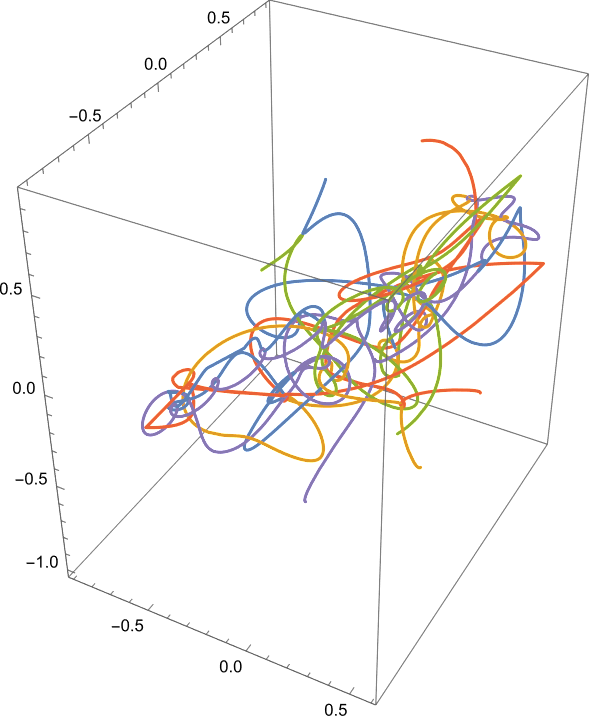

In [50]:
Show[
 ParametricPlot3D[Evaluate[data[All, "Position", t]], {t, 0, 5}],
 Axes -> True]

Now let's make a fun animation!

In [86]:
frame[t2_]:=ParametricPlot3D[Evaluate[data[All, "Position", t]], {t, 0.01, t2},PlotPoints->Round[t2/5 1000],Axes->False,Boxed->False];

Manipulate[PaneSelector[{1 -> -Graphics3D-, 2 -> -Graphics3D-, 3 -> -Graphics3D-, 
 
>     4 -> -Graphics3D-, 5 -> -Graphics3D-, 6 -> -Graphics3D-, 7 -> -Graphics3D-, 
 
>     8 -> -Graphics3D-, 9 -> -Graphics3D-, 10 -> -Graphics3D-, 11 -> -Graphics3D-, 
 
>     12 -> -Graphics3D-, 13 -> -Graphics3D-, 14 -> -Graphics3D-, 15 -> -Graphics3D-, 
 
>     16 -> -Graphics3D-, 17 -> -Graphics3D-, 18 -> -Graphics3D-, 19 -> -Graphics3D-, 
 
>     20 -> -Graphics3D-, 21 -> -Graphics3D-, 22 -> -Graphics3D-, 23 -> -Graphics3D-, 
 
>     24 -> -Graphics3D-, 25 -> -Graphics3D-, 26 -> -Graphics3D-, 27 -> -Graphics3D-, 
 
>     28 -> -Graphics3D-, 29 -> -Graphics3D-, 30 -> -Graphics3D-, 31 -> -Graphics3D-, 
 
>     32 -> -Graphics3D-, 33 -> -Graphics3D-, 34 -> -Graphics3D-, 35 -> -Graphics3D-, 
 
>     36 -> -Graphics3D-, 37 -> -Graphics3D-, 38 -> -Graphics3D-, 39 -> -Graphics3D-, 
 
>     40 -> -Graphics3D-, 41 -> -Graphics3D-, 42 -> -Graphics3D-, 43 -> -Graphics3D-, 
 
>     44 -> -Graphics3D-, 45 -> -Graphics3D-, 46 -> -Graphics3D-, 47 -> -Graphics3D-, 
 
>     48 -> -Graphics3D-, 49 -> -Graphics3D-}, Dynamic[i57], ImageSize -> All, 
 
>    Alignment -> Automatic, BaseStyle -> ListAnimateCore, 
 
>    TransitionDirection -> Horizontal, TransitionDuration -> 0.5, 
 
>    TransitionEffect -> Automatic], 
 
>   {{i57, 1, }, 1, 49, 1, AnimationRate -> Automatic, DisplayAllSteps -> True, 
 
>    AppearanceElements -> 
 
>     {ProgressSlider, PlayPauseButton, FasterSlowerButtons, DirectionButton}}, 
 
>   ControlType -> Animator, AppearanceElements -> None, 
 
>   DefaultBaseStyle -> ListAnimate, DefaultLabelStyle -> ListAnimateLabel, 
 
>   SynchronousUpdating -> True, Method -> 
 
>    {DynamicCore -> False, TemplateExpand -> True}, 
 
>   Bookmarks -> {min :> {i57 = 1}, max :> {i57 = 49}}]
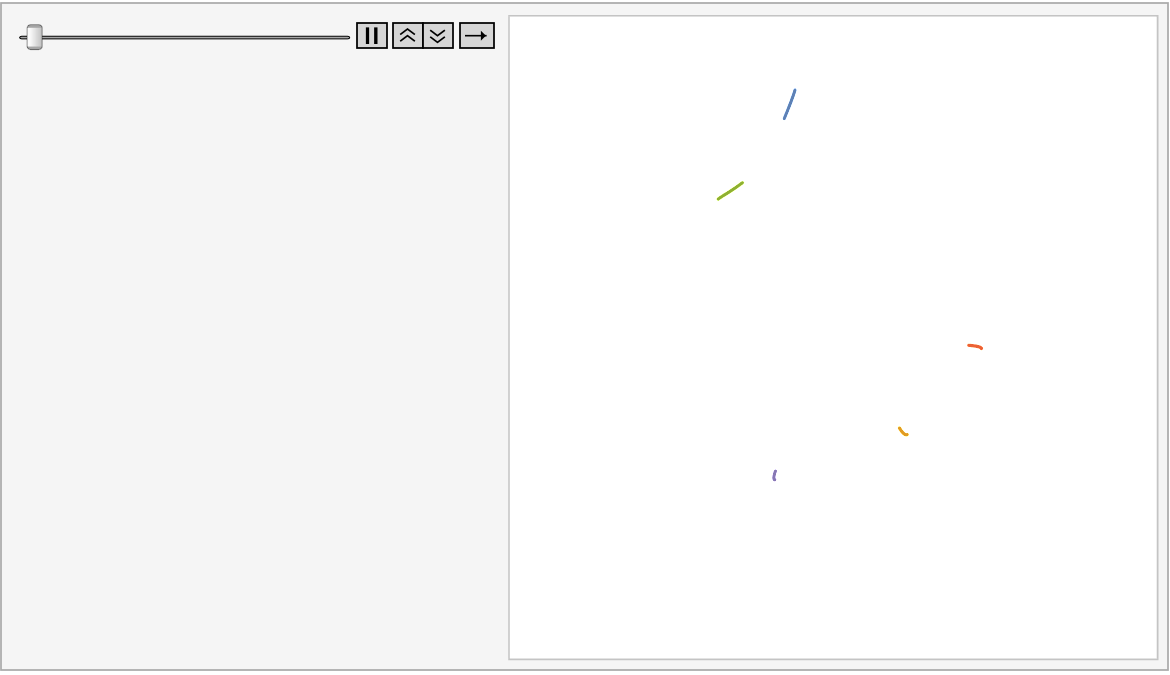

In [82]:
frames=Table[frame[t3],{t3,0.2,5,.1}];
ListAnimate[frames]

## Your thoughts?

Just some fun playing around but I'd love to hear your thoughts. Here are some starters for you:

- This is cool! What if you . . .
- This is dumb. You could just go outside and throw five balls
- Is this faster than setting up your own `NDSolve` command with a bounce potential at the outside of the `Ball[]`?
- Why aren't you exploring the cool asteroid simulation that's in the [help documents for the Wolfram Engine](https://www.wolfram.com/language/12/astronomy-and-space-science-entities/perform-n-body-simulations-of-asteroids.html?product=mathematica)?
- You pretend that your own old blog post inspired this but I assume Rhett Allain was doing some gravity simulations recently.